1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

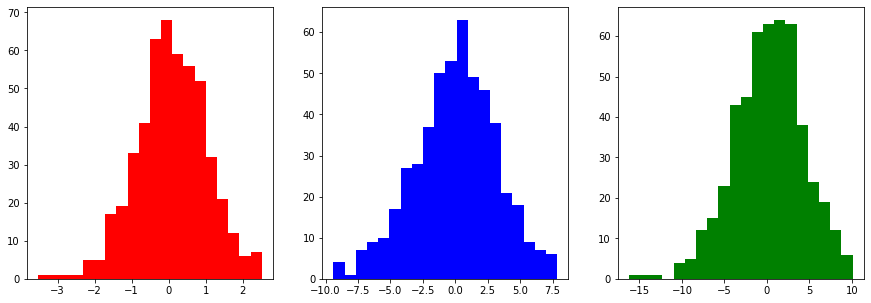

################################################################################
Eigenvalue:26.250275217555302  ,	eigenvector: [-0.10678625 -0.58812025 -0.80169275]
Eigenvalue:8.983505187133126e-16  ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue:1.8221658680262622  ,	eigenvector: [ 0.56738878 -0.69817469  0.43660287]


In [2]:
entries = 500
limit = 1e-13

f1 = np.random.normal(loc=0.0, scale=1.0, size=entries)
f2 = f1+np.random.normal(loc=0.0, scale=3.0, size=entries)
f3 = 2*f1 + f2

fig, ax = plt.subplots(1, 3, figsize=(15,5))

n_bins=20
ax[0].hist(f1, bins=n_bins, color='red')
ax[1].hist(f2, bins=n_bins, color='blue')
ax[2].hist(f3, bins=n_bins, color='green')
plt.show()

print('#'*80)

M = np.array([f1,f2,f3])
cov = np.cov(M)

l, V = la.eig(cov)
l = np.real_if_close(l)


for li, vi in zip(l, V.T):
    print(f"Eigenvalue:{li}", f" ,\teigenvector: {vi}", )

In [3]:
cov = np.cov(M)
aval, V = la.eig(cov) 
aval = np.real_if_close(aval)
aval[abs(aval)<limit]=0

print("Covariance matrix:\n", cov, '\n')
print("Eigenvectors:\n", V, '\n')


U, S, Vt = la.svd(M)

aval_svd = S**2/(entries-1)
avet_svd = U

print("SVD :\n", aval_svd, '\n')
print("Eigenvectors:\n", avet_svd, '\n')

Covariance matrix:
 [[ 0.88594976  0.92677375  2.69867327]
 [ 0.92677375  9.96779865 11.82134614]
 [ 2.69867327 11.82134614 17.21869268]] 

Eigenvectors:
 [[-0.10678625 -0.81649658  0.56738878]
 [-0.58812025 -0.40824829 -0.69817469]
 [-0.80169275  0.40824829  0.43660287]] 

SVD :
 [2.62720977e+01 1.83446532e+00 1.09715160e-31] 

Eigenvectors:
 [[-0.10716668  0.56731705 -0.81649658]
 [-0.58765197 -0.69856889 -0.40824829]
 [-0.80198533  0.43606521  0.40824829]] 



In [4]:
X_diag = V.T @ M
X_diag[np.abs(X_diag)<limit]=0


variability = aval/cov.trace()
mask = np.isclose(variability,0) 

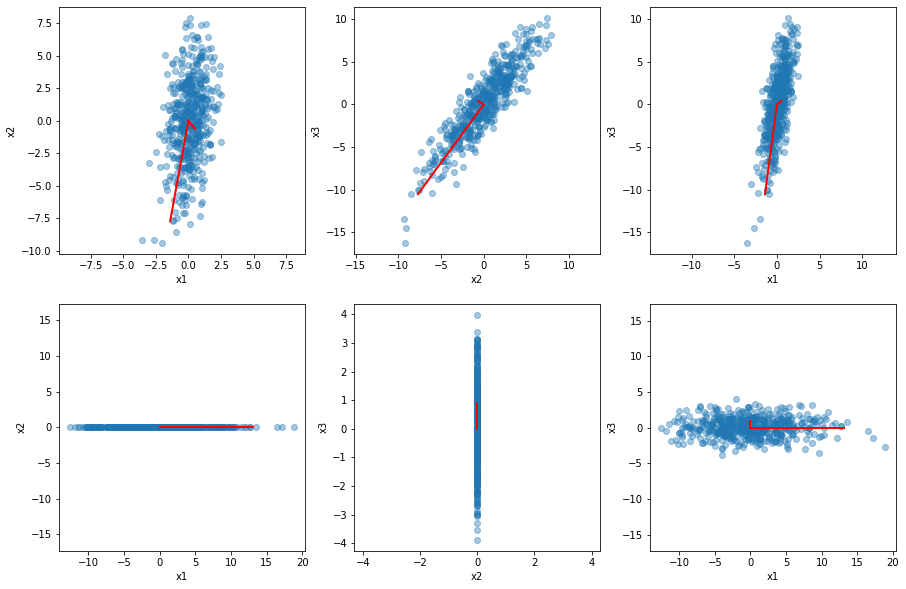

In [12]:
def plot_set(j, data, aval, V):
    s=1/2
    V[abs(V)<limit]=0 
    couples=[(0,1),(1,2),(0,2)] 
    for c,col in zip(couples,range(3)):
        ax[j,col].scatter(data[c[0]], data[c[1]], alpha=0.4,)
        for i in range(3): 
            ax[j,col].plot([0, s * aval[i] * V.T[i,c[0]]],[0, s * aval[i] * V.T[i,c[1]]],'r-', lw=2)
        
        ax[j,col].set_xlabel("x"+str(1+c[0]))
        ax[j,col].axis('equal')
        ax[j,col].set_ylabel("x"+str(1+c[1]))
        
        
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15, 10))
plot_set(0, M,aval, V)
plot_set(1, X_diag, aval, V@V.T)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd

var = 10

sigma = np.diag(np.random.uniform(0, 1/20, var))
mu = [0] * var
noise = np.random.multivariate_normal(mu, sigma, entries).T

Y = np.concatenate((M, noise)) # Set + noise

#The dataset 
col = ['x'+str(i+1) for i in range(var+3)]
df = pd.DataFrame(Y.T, columns=col)
print(df.head())
print('#'*80)

cov = np.cov(Y)
lY, VY = la.eig(cov) 
lY = np.real_if_close(lY)
lY[abs(lY)<limit]=0

np.set_printoptions(precision=2)
print("Eigendecomposition of Y\n", lY, '\n')
# print("Eigenvectors:\n", VY, '\n')

print("Eigendecomposition of X :\n", aval, '\n')
#print("Eigenvectors:\n", V, '\n')

         x1        x2        x3  ...       x11       x12       x13
0  1.324548  3.109346  5.758441  ...  0.005414  0.048167  0.078894
1  0.846326 -1.261910  0.430743  ...  0.042636  0.114972 -0.377473
2  1.026056  0.846544  2.898656  ... -0.008161 -0.064765  0.043690
3  0.791516 -1.264218  0.318814  ...  0.057235  0.005190 -0.292189
4 -1.024305  0.340599 -1.708010  ...  0.057897 -0.175293  0.149141

[5 rows x 13 columns]
################################################################################
Eigendecomposition of Y
 [2.63e+01 1.82e+00 4.44e-02 4.27e-02 3.91e-02 3.82e-02 0.00e+00 1.44e-03
 3.15e-03 1.38e-02 1.61e-02 1.89e-02 2.00e-02] 

Eigendecomposition of X :
 [26.25  0.    1.82] 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77d7b09bd0>,
      dtype=object)

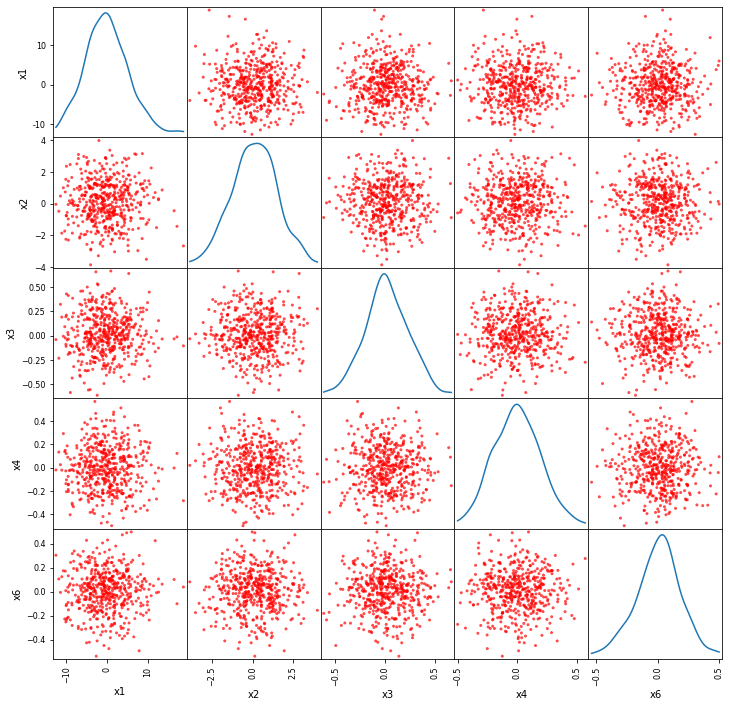

In [9]:
variability = lY/cov.trace()

def reduce_PCA(threshold, aval, variability):
    cum_var = np.cumsum(-np.sort(-variability))
    last_index = len(cum_var[cum_var<threshold])
    cleaned_aval = (-np.sort(-aval))[0:last_index]
    d = {aval: idx for idx, aval in enumerate(aval)}
    return [d.get(aval) for aval in cleaned_aval]


Y_diag = VY.T @ Y
Y_diag[np.abs(Y_diag)<limit]=0


threshold = 0.997
index = reduce_PCA(threshold,lY, variability)

df = pd.DataFrame(Y_diag[index].T, columns=np.array(col)[index])
df

pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12,12),alpha=0.7, grid=True, color='red')


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [10]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 